### Формула Бернулли

p = 0.3

k = 1

n = 8

special.comb(n, k) * (p ** k) * (1- p) ** (n-k)

[1. Устройство, состоящее из пяти независимо работающих элементов, включается за время Т. Вероятность отказа каждого из них за это время равна 0,4. Найти вероятность того, что откажут три элемента.](#1)

[2. Устройство, состоящее из пяти независимо работающих элементов, включается за время Т. Вероятность отказа каждого из них за это время равна 0,4. Найдите вероятность того, что хотя бы один элемент откажет.](#2)

[3. Производится 8 выстрелов по цели, в каждом из которых вероятность попадания равна 0,3. Найти вероятность того, что цель будет поражена хотя бы два раза.](#3)

[4. В магазине 7 покупателей. Каждый может совершить покупку с вероятностью 0,4. Найти вероятность того, что не более двух человек совершат покупку.](#4)

[5. В телеателье имеется 7 телевизоров. Для каждого телевизора вероятность того, что в данный момент он включен, равна 0,5. Найти вероятность того, что в данный момент включены не менее трех телевизоров.](#5)

[6. Пусть вероятность того, что покупателю необходим компьютер с операционной системой Linux, равна 0.25. Найдите вероятность того, что из шести покупателей по крайней мере двум необходим компьютер с операционной системой Linux.](#6)

[7. Для нормальной работы отдела по дата-аналитике необходимо, чтобы в офисе было не менее восьми программистов, а всего в штате 10 программистов. Вероятность того, что программист заболеет, равна 0.1. Найдите вероятность нормальной работы отдела по дата-аналитике.](#7)

[8. Среди всех скриптов, которые пишет программист, с 10%-ой вероятностью скрипт будет с ошибкой. Найдем вероятность того, что среди 30 скриптов два не будут работать.](#8)

[9. В урне 20 шаров: 15 белых и 5 чёрных. Вынули подряд 5 шаров, причём каждый вынутый шар возвращается в урну и перед извлечением следующего шары в урне тщательно перемешиваются. Найдите вероятность того, что из пяти вынутых шаров будет 2 белых.](#9)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import special
plt.style.use('dark_background')

<a id="1"></a>
Задача: Устройство, состоящее из пяти независимо работающих элементов, включается за время Т. 

Вероятность отказа каждого из них за это время равна 0,4. 

Найти вероятность того, что откажут три элемента.

In [16]:
#special.comb(n, k)
p = 0.4
q = 1- p
k = 3
n = 5

special.comb(n, k) * (p**k) * ((1- p)**(n-k))


np.float64(0.23040000000000005)

In [86]:
def test(n):
    cnt = 0
    for _ in range(n):
        elements = np.random.binomial(1,0.4,5)
        if pd.Series(elements).sum() ==3:
            cnt = cnt + 1
    cnt = cnt / n
    return cnt

res = []

[res.append(test(1000)) for _ in range(100)]
pd.Series(res).mean()




np.float64(0.22875999999999996)

<Axes: >

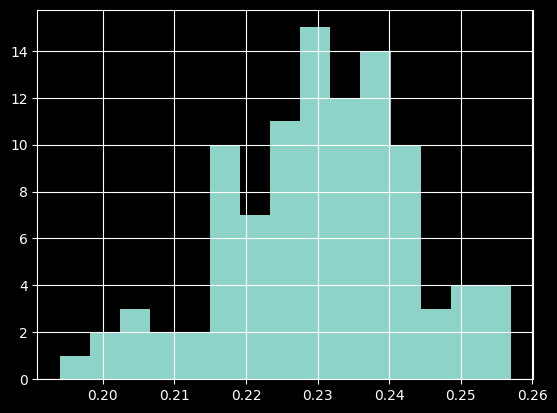

In [52]:
pd.Series(res).hist(bins = 15)

<a id="2"></a>
Задача: Устройство, состоящее из пяти независимо работающих элементов, включается за время Т. 

Вероятность отказа каждого из них за это время равна 0,4. 

Найдите вероятность того, что хотя бы один элемент откажет.

In [56]:
#Хотя бы один откажет - обратное от ни один не отказал
1-0.6**5

0.9222400000000001

In [ ]:
def test2(n):
    cnt = 0
    for _ in range(n):
        elements = np.random.binomial(1,0.4,5)
        if pd.Series(elements).sum() > 0:
            cnt = cnt + 1
    cnt = cnt / n
    return cnt

res = []

[res.append(test2(1000)) for _ in range(100)]
pd.Series(res).mean()

np.float64(0.9213400000000002)

<a id="3"></a>
Задача: Производится 8 выстрелов по цели, в каждом из которых вероятность попадания равна 0,3.

Найти вероятность того, что цель будет поражена хотя бы два раза.

In [79]:
# Хотя бы два раза - обратное от поражена 1 раз (0.3*0.7*8) или не поражена ни разу ()

#поражена 1 раз - 8 вариантов 0,3*0,7**7 или то есть восесь раз сложить, то есть 8*0.3*0.7**7
#восемь промахов = 0.7**8

1 - (8*0.3*0.7**7 + 0.7**8)

0.7447016700000001

In [83]:
# через формулу можно посчитать вроетяноть 1 попадания из 8
p = 0.3
q = 1- p
k = 1
n = 8

1 - (special.comb(n, k) * (p**k) * ((1- p)**(n-k)) + 0.7**8)

np.float64(0.7447016700000001)

In [91]:
def test3(n):
    cnt = 0
    for _ in range(n):
        elements = np.random.binomial(1,0.3,8)
        if pd.Series(elements).sum() > 1:
            cnt = cnt + 1
    cnt = cnt / n
    return cnt

res = []

[res.append(test3(1000)) for _ in range(100)]
pd.Series(res).mean()

np.float64(0.74512)

<a id="4"></a>
Задача: В магазине 7 покупателей. 

Каждый может совершить покупку с вероятностью 0,4. 

Найти вероятность того, что не более двух человек совершат покупку.

In [ ]:
# Не более 2 покупок - значит 0 или 1 или 2 покупки

# 0 покупок - 0.6**7
# 1 покупка - 7*0,4*0,6**6
# 2 покупки - 
p = 0.4
q = 1-  p
k = 2
n = 7

special.comb(n, k) * (p**k) * ((1- p)**(n-k)) + 7 * 0.4 * 0.6**6 + 0.6**7

np.float64(0.419904)

In [92]:
def test4(n):
    cnt = 0
    for _ in range(n):
        elements = np.random.binomial(1,0.4,7)
        if pd.Series(elements).sum() <= 2:
            cnt = cnt + 1
    cnt = cnt / n
    return cnt

res = []

[res.append(test4(1000)) for _ in range(100)]
pd.Series(res).mean()

np.float64(0.42256000000000005)

<a id="5"></a>
Задача: В телеателье имеется 7 телевизоров. 

Для каждого телевизора вероятность того, что в данный момент он включен, равна 0,5.

Найти вероятность того, что в данный момент включены не менее трех телевизоров.

In [59]:
# Не менее трех включены значит включено 3 или 4 или 5 или 6 или 7 
res = []
for i in range(3,8):
    p = 0.5
    q = 1- p
    k = i
    n = 7
    res.append(special.comb(n, k) * (p**k) * ((1- p)**(n-k)))
pd.Series(res).sum()

np.float64(0.7734375)

In [85]:
def tele_test(n):
    x = []
    res = []
    cnt = 0
    for _ in range(n):
        x = np.random.binomial(1,0.5,7)
        if x.sum() > 2:
            cnt = cnt + 1
    return cnt/n

r = []
[r.append(tele_test(10)) for _ in range(1000)]
pd.Series(r).mean()



np.float64(0.7735)

<a id="6"></a>
Задача: Пусть вероятность того, что покупателю необходим компьютер с операционной системой Linux, равна 0.25.

Найдите вероятность того, что из шести покупателей по крайней мере двум необходим компьютер с операционной системой Linux.

In [97]:
# Хотя бы двум - двум и больше - все 1 кроме - "одному" + "никому"

p = 0.25
q = 1 - p
k = 1
n = 6

1 - (special.comb(n, k) * (p**k) * ((1- p)**(n-k)) + 0.75**6)

np.float64(0.466064453125)

In [134]:
cnt = 1
for _ in range(10000):
    if np.random.binomial(1,0.25,6).sum () > 1: cnt = cnt + 1
cnt / 100



46.02

<a id="7"></a>
Задача: Для нормальной работы отдела по дата-аналитике необходимо, чтобы в офисе было не менее 8 программистов, а всего в штате 10 программистов. 

Вероятность того, что программист заболеет, равна 0.1. 

Найдите вероятность нормальной работы отдела по дата-аналитике.

In [139]:
# не менее 8 - 8 или больше: 8 или 9 или 10

p = 1-0.1
q = 1 - p
k = 8
n = 10

p8 = special.comb(n, k) * (p**k) * ((1- p)**(n-k))

p = 1-0.1
q = 1 - p
k = 9
n = 10

p9 = special.comb(n, k) * (p**k) * ((1- p)**(n-k))

p8 + p9 + 0.9**10

np.float64(0.9298091736)

<a id="8"></a> Среди всех скриптов, которые пишет программист, с 10%-ой вероятностью скрипт будет с ошибкой.

 Найдем вероятность того, что среди 30 скриптов два не будут работать.

In [188]:
p = 0.1
q = 1 - p
k = 2
n = 30

special.comb(n, k) * (p**k) * ((1- p)**(n-k))

np.float64(0.22765622036690203)

In [196]:
t = []
[t.append(1) for _ in range(100000) if np.random.binomial(1,0.1,30).sum() == 2]
pd.Series(t).sum()/100000

np.float64(0.22816)

<a id="9"></a> В урне 20 шаров: 15 белых и 5 чёрных. 

Вынули подряд 5 шаров, причём каждый вынутый шар возвращается в урну и перед извлечением следующего шары в урне тщательно перемешиваются. 

Найдите вероятность того, что из пяти вынутых шаров будет 2 белых.

In [296]:
p = 15/20
q = 1 - p
k = 2
n = 5

special.comb(n, k) * (p**k) * ((1- p)**(n-k))

np.float64(0.087890625)